<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# TODO - your code here!

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [14]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 22.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [3]:
column_names = ['party_affiliation', 'handicapped_infants', 'water_project_cost_sharing', 
                'adoption_of_the_budget_resolution', 'physician_fee_freeze', 
                'el_salvador_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban',
                'aid_to_nicaraguan_contras', 'mx_missile', 'immigration', 
                'synfuels_corporation_cutback', 'education_spending', 
                'superfund_right_to_sue', 'crime', 'duty_free_exports', 
                'export_administration_act_south_africa']
vote_data = pd.read_csv(url, header=None, names=column_names)
vote_data.head()

,party_affiliation,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [18]:
vote_data_replace = vote_data.replace('?', np.nan)
#print(vote_data.isna().sum())
vote_data_replace.head()

,party_affiliation,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [23]:
pd.value_counts(vote_data_replace['handicapped_infants'].values)

n    236
y    187
dtype: int64

In [26]:
pd.value_counts(vote_data_replace['water_project_cost_sharing'].values, normalize=True)

y    0.503876
n    0.496124
dtype: float64

In [27]:
vote_data_replace.describe().T

,count,unique,top,freq
party_affiliation,435,2,democrat,267
handicapped_infants,423,2,n,236
water_project_cost_sharing,387,2,y,195
adoption_of_the_budget_resolution,424,2,y,253
physician_fee_freeze,424,2,n,247
el_salvador_aid,420,2,y,212
religious_groups_in_schools,424,2,y,272
anti_satellite_test_ban,421,2,y,239
aid_to_nicaraguan_contras,420,2,y,242
mx_missile,413,2,y,207


In [29]:
percents = vote_data_replace.describe().T
percents['percent'] = percents['freq']/percents['count']
print(percents)

                                       count unique       top freq   percent
party_affiliation                        435      2  democrat  267  0.613793
handicapped_infants                      423      2         n  236   0.55792
water_project_cost_sharing               387      2         y  195  0.503876
adoption_of_the_budget_resolution        424      2         y  253  0.596698
physician_fee_freeze                     424      2         n  247  0.582547
el_salvador_aid                          420      2         y  212  0.504762
religious_groups_in_schools              424      2         y  272  0.641509
anti_satellite_test_ban                  421      2         y  239  0.567696
aid_to_nicaraguan_contras                420      2         y  242   0.57619
mx_missile                               413      2         y  207  0.501211
immigration                              428      2         y  216  0.504673
synfuels_corporation_cutback             414      2         n  264  0.637681

In [51]:
#pd.crosstab(vote_data_replace['party_affiliation'], vote_data_replace[['handicapped_infants', vote_data_replace'water_project_cost_sharing']])
crosstab = pd.crosstab(vote_data_replace['party_affiliation'], [vote_data_replace['handicapped_infants'], 
            vote_data_replace['water_project_cost_sharing'], vote_data_replace['adoption_of_the_budget_resolution'],
            vote_data_replace['physician_fee_freeze'],
            vote_data_replace['el_salvador_aid'],
            vote_data_replace['religious_groups_in_schools'],
            vote_data_replace['anti_satellite_test_ban'],
            vote_data_replace['aid_to_nicaraguan_contras'],
            vote_data_replace['mx_missile'],
            vote_data_replace['immigration'],
            vote_data_replace['synfuels_corporation_cutback'],
            vote_data_replace['education_spending'],
            vote_data_replace['superfund_right_to_sue'],
            vote_data_replace['crime'],
            vote_data_replace['duty_free_exports'],
            vote_data_replace['export_administration_act_south_africa']])
print(crosstab)

handicapped_infants                     n                            ...  y  \
water_project_cost_sharing              n                            ...  y   
adoption_of_the_budget_resolution       n                            ...  y   
physician_fee_freeze                    n              y             ...  n   
el_salvador_aid                         n        y     n  y          ...  n   
religious_groups_in_schools             n  y     y     n  n          ...  y   
anti_satellite_test_ban                 y  n  y  n  y  y  n        y ...  y   
aid_to_nicaraguan_contras               y  y  y  n  n  y  n        n ...  y   
mx_missile                              y  y  y  n  n  y  n        y ...  y   
immigration                             y  n  n  y  n  y  n     y  y ...  y   
synfuels_corporation_cutback            n  y  y  y  n  n  n     n  n ...  y   
education_spending                      y  y  n  y  y  n  y     y  n ...  n   
superfund_right_to_sue                  y  y  n  y  

In [60]:
demdf= vote_data_replace.loc[vote_data_replace['party_affiliation'] == 'democrat']
repdf= vote_data_replace.loc[vote_data_replace['party_affiliation'] == 'republican']
#demdf.head()
#repdf.head()

,party_affiliation,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
10,republican,n,y,n,y,y,n,n,n,n,n,NaN,NaN,y,y,n,n


In [61]:
dempercents = demdf.describe().T
dempercents['percent'] = dempercents['freq']/dempercents['count']
print(dempercents)

                                       count unique       top freq   percent
party_affiliation                        267      1  democrat  267         1
handicapped_infants                      258      2         y  156  0.604651
water_project_cost_sharing               239      2         y  120  0.502092
adoption_of_the_budget_resolution        260      2         y  231  0.888462
physician_fee_freeze                     259      2         n  245  0.945946
el_salvador_aid                          255      2         n  200  0.784314
religious_groups_in_schools              258      2         n  135  0.523256
anti_satellite_test_ban                  259      2         y  200  0.772201
aid_to_nicaraguan_contras                263      2         y  218  0.828897
mx_missile                               248      2         y  188  0.758065
immigration                              263      2         n  139  0.528517
synfuels_corporation_cutback             255      2         y  129  0.505882

In [76]:
reppercents = repdf.describe().T
reppercents['percent'] = reppercents['freq']/reppercents['count']
print(reppercents)

                                       count unique         top freq   percent
party_affiliation                        168      1  republican  168         1
handicapped_infants                      165      2           n  134  0.812121
water_project_cost_sharing               148      2           y   75  0.506757
adoption_of_the_budget_resolution        164      2           n  142  0.865854
physician_fee_freeze                     165      2           y  163  0.987879
el_salvador_aid                          165      2           y  157  0.951515
religious_groups_in_schools              166      2           y  149   0.89759
anti_satellite_test_ban                  162      2           n  123  0.759259
aid_to_nicaraguan_contras                157      2           n  133  0.847134
mx_missile                               165      2           n  146  0.884848
immigration                              165      2           y   92  0.557576
synfuels_corporation_cutback             159      2 

In [113]:
reppercents.sort_values(by=['top', 'percent'], ascending=False)

,count,unique,top,freq,percent
physician_fee_freeze,165,2,y,163,0.987879
crime,161,2,y,158,0.981366
el_salvador_aid,165,2,y,157,0.951515
religious_groups_in_schools,166,2,y,149,0.89759
education_spending,155,2,y,135,0.870968
superfund_right_to_sue,158,2,y,136,0.860759
export_administration_act_south_africa,146,2,y,96,0.657534
immigration,165,2,y,92,0.557576
water_project_cost_sharing,148,2,y,75,0.506757
party_affiliation,168,1,republican,168,1


In [114]:
dempercents.sort_values(by=['top', 'percent'], ascending=False)

,count,unique,top,freq,percent
export_administration_act_south_africa,185,2,y,173,0.935135
adoption_of_the_budget_resolution,260,2,y,231,0.888462
aid_to_nicaraguan_contras,263,2,y,218,0.828897
anti_satellite_test_ban,259,2,y,200,0.772201
mx_missile,248,2,y,188,0.758065
duty_free_exports,251,2,y,160,0.63745
handicapped_infants,258,2,y,156,0.604651
synfuels_corporation_cutback,255,2,y,129,0.505882
water_project_cost_sharing,239,2,y,120,0.502092
physician_fee_freeze,259,2,n,245,0.945946


In [72]:
dempercents.describe()

,count,unique,top,freq,percent
count,17,17,17,17,17.000000
unique,13,2,3,16,17.000000
top,255,2,y,200,0.935135
freq,2,16,9,2,1.000000


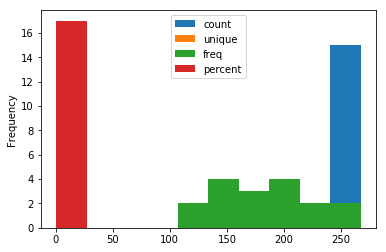

In [73]:
dempercents.plot.hist()

In [66]:
reppercents.describe()

,count,unique,top,freq,percent
count,17,17,17,17,17.000000
unique,13,2,3,16,17.000000
top,165,2,y,142,0.657534
freq,5,16,9,2,1.000000


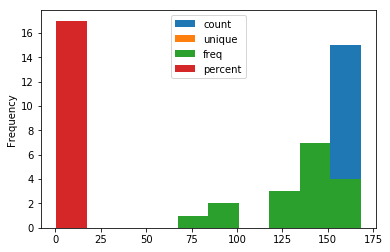

In [68]:
reppercents.plot.hist()

In [0]:
reppercents2 = repdf.describe()
#reppercents['percent'] = reppercents['freq']/reppercents['count']
print(reppercents2)

In [0]:
dempercents2 = repdf.describe()

In [96]:
import scipy
scipy.stats.ttest_ind(dempercents['freq'], reppercents['freq'])

Ttest_indResult(statistic=4.086439898188579, pvalue=0.0002745429097309495)

In [108]:
scipy.stats.ttest_ind(dempercents['percent'], reppercents['percent'])


Ttest_indResult(statistic=-1.992658504864423, pvalue=0.054886175271163705)